In [1]:
import os
import re
import h5py
import random
import numpy as np
import pandas as pd
import scipy.io
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import utils

In [2]:
datadir = '../datasets/NNN/'
fnames = utils.fnames(datadir)
raster_data = pd.read_pickle(os.path.join(datadir, ('unit_data_full.pkl')))

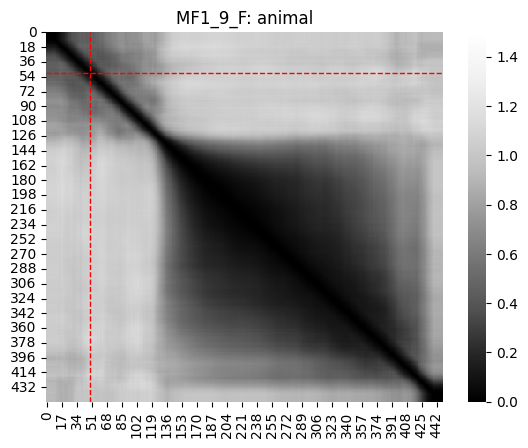

In [24]:
labels = pd.read_csv(os.path.join(datadir, 'shared1000_HED.tsv'), sep='\t')
targets = ['animal']

mask = labels["HED_short"].str.lower().apply(
    lambda x: all(t in x for t in targets) if isinstance(x, str) else False
)
to_idx = labels[mask].index.tolist()

metric = 'correlation'
roi = 'MF1_9_F' #'MF1_9_F'
roi_data = raster_data[(raster_data['roi']==roi)]
stacked = np.stack(roi_data['img_psth'])

substacked = stacked[:, :, to_idx]
# average over units
averaged = np.mean(substacked, axis=0)

fig,ax = plt.subplots(1,1)

rdm = squareform(pdist(averaged, metric=metric))
sns.heatmap(rdm, cmap=sns.color_palette('Greys_r', as_cmap=True), vmax=1.5)
ax.set_title(f'{roi}: {'.'.join(targets)}')

ax.axvline(x=50, color='red', linestyle='--', linewidth=1)
ax.axhline(y=50, color='red', linestyle='--', linewidth=1)
plt.show()

In [2]:
raster_data['session'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59])

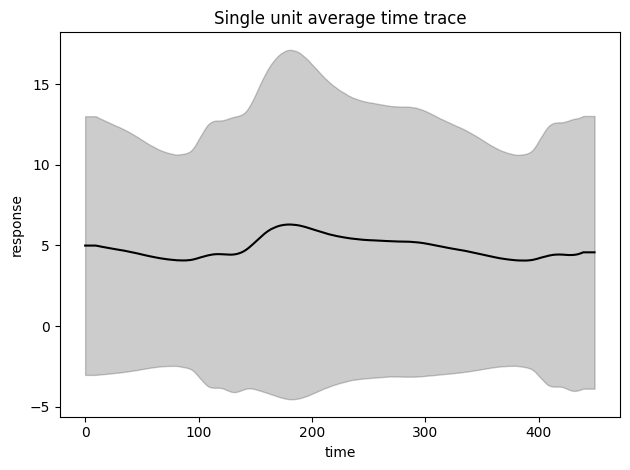

In [5]:
single_units = raster_data[raster_data['unit_type']==1]
stacked = np.stack(single_units['img_psth'])
mean_per_unit = stacked.mean(axis=2)

df_long = pd.DataFrame(mean_per_unit).melt(var_name='time', value_name='response')
df_long['unit'] = np.repeat(np.arange(mean_per_unit.shape[0]), mean_per_unit.shape[1])

plt.subplots(1,1)
sns.lineplot(data=df_long, x='time', y='response', errorbar='sd', color='black')
plt.title('Single unit average time trace')
plt.tight_layout()
plt.show()

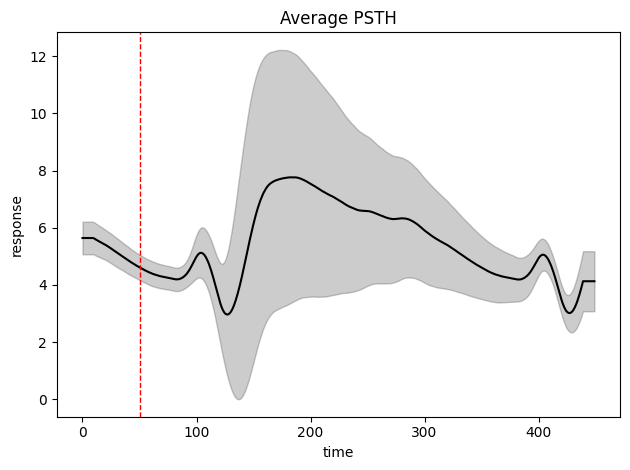

In [31]:
roi = 'MF1_8_F' #'MF1_9_F'
roi_data = raster_data[(raster_data['roi']==roi)]

stacked = np.stack(roi_data['img_psth'])
averaged = np.mean(stacked, axis=0) # shape (450,1072)
df = pd.DataFrame(averaged)  # shape (450, 1072)
df_long = df.melt(var_name='image', value_name='response')
df_long['time'] = np.tile(np.arange(df.shape[0]), df.shape[1])



fig,ax=plt.subplots(1,1)
sns.lineplot(
    data=df_long, x='time', y='response',
    errorbar='sd',
    color='black',
    ax=ax
)
ax.axvline(x=50, color='red', linestyle='--', linewidth=1)
plt.title('Average PSTH')
plt.tight_layout()
plt.show()

[None 'MB1_3_B' 'MO2_21_O' 'Unknown_22_O' 'MB2_20_B' 'Unknown_11_O'
 'Unknown_20_B' 'MO1s1_4_O' 'Unknown_4_O' 'Unknown_6_B' 'MB2_21_B'
 'LPP4_1_O' 'Unknown_19_F' 'LPP1_2_O' 'Unknown_9_B' 'MF1_9_F'
 'Unknown_23_B' 'MB1_8_B' 'MF1_8_F' 'Unknown_15_O' 'AF3_18_F' 'AB3_18_B'
 'CLC3_13_O' 'Unknown_14_O' 'AO2_24_O' 'PITP4_10_O' 'MB3_12_B'
 'Unknown_6_O' 'MF1_7_F' 'MO1s2_5_O' 'Unknown_5_F' 'AB3_12_B'
 'Unknown_16_O' 'AB3_17_B' 'Unknown_26_O' 'Unknown_27_B' 'AO5_25_O'
 'AMC3_28_F']


In [31]:
np.setdiff1d(np.arange(1000, 1072), np.concatenate([np.arange(1000,1024), np.arange(1025,1031), np.arange(1043,1049), np.arange(1051,1062)]))

array([1024, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040,
       1041, 1042, 1049, 1050, 1062, 1063, 1064, 1065, 1066, 1067, 1068,
       1069, 1070, 1071])

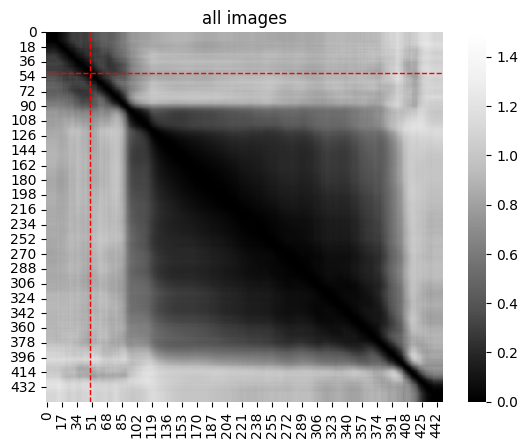

/Users/aim/miniconda3/envs/dynamics/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


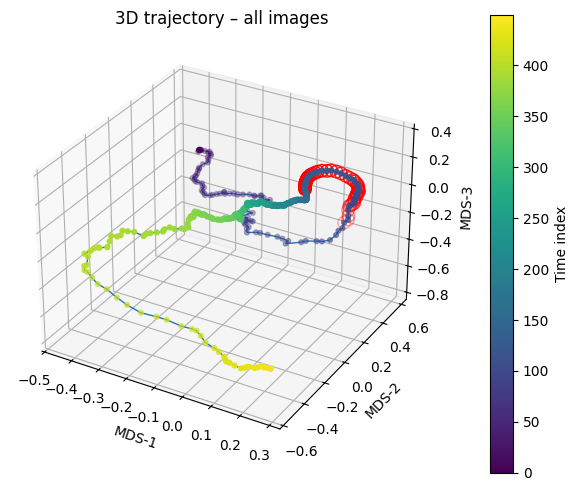

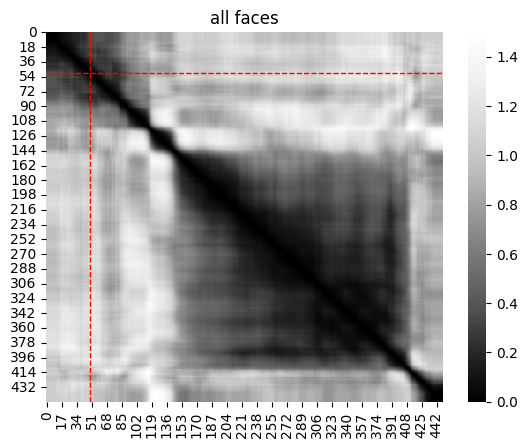

/Users/aim/miniconda3/envs/dynamics/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


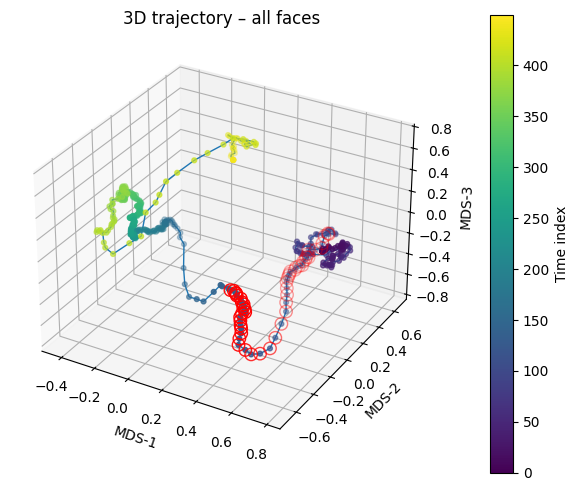

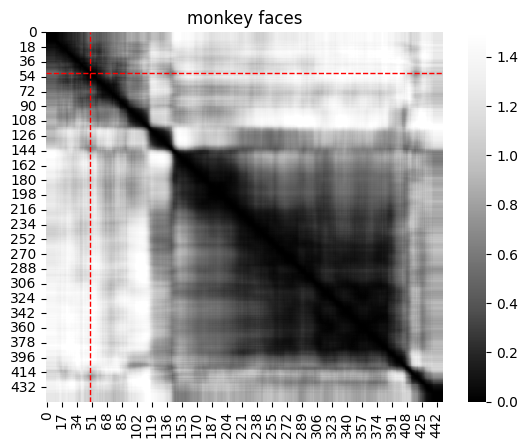

/Users/aim/miniconda3/envs/dynamics/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


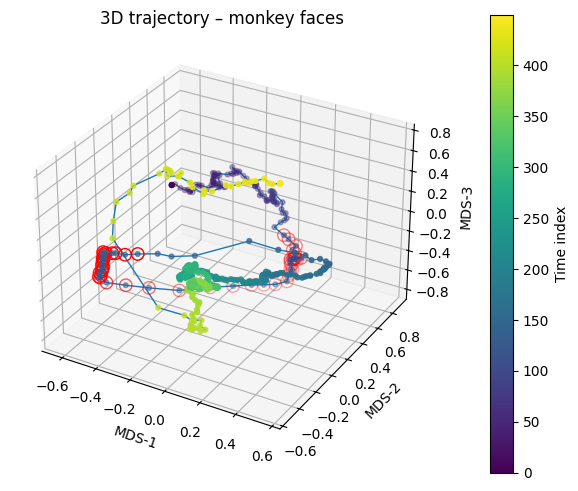

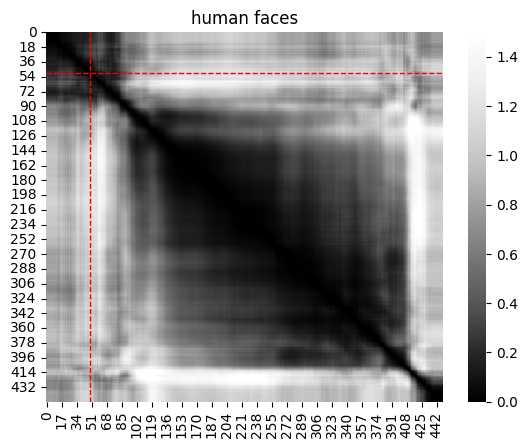

/Users/aim/miniconda3/envs/dynamics/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


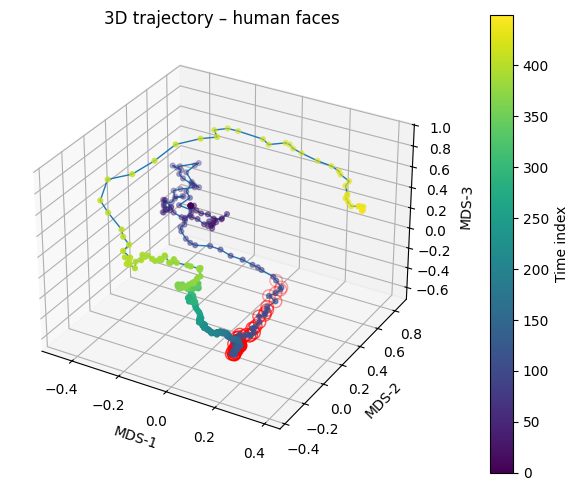

In [3]:
img_sets = {'all images': np.arange(1000,1072), 
           'all faces': np.arange(1000,1024),
           'monkey faces':  np.concatenate([np.arange(1000,1006), np.arange(1009,1016)]),
           'human faces': np.concatenate([np.arange(1006,1009), np.arange(1016,1025)])}

# img_sets = {'all images': np.arange(1000,1072), 
#            'all nonfaces': np.arange(1025,1072),
#            'monkey bodies': np.concatenate([np.arange(1026,1031), np.arange(1043,1049)]),
#            'animal bodies': np.concatenate([np.arange(1026,1031), np.arange(1043,1049), np.arange(1051,1062)]),
#            'all objects': np.setdiff1d(np.arange(1000, 1072), np.concatenate([np.arange(1000,1024), np.arange(1025,1031), np.arange(1043,1049), np.arange(1051,1062)]))}

metric = 'correlation'
roi = 'MF1_8_F' #'MF1_9_F'
roi_data = raster_data[(raster_data['roi']==roi)]
stacked = np.stack(roi_data['img_psth'])

for k,v in img_sets.items():
    substacked = stacked[:, :, v]
    # average over units
    averaged = np.mean(substacked, axis=0)
    
    fig,ax = plt.subplots(1,1)

    # plot rdm
    rdm = squareform(pdist(averaged, metric=metric))
    sns.heatmap(rdm, cmap=sns.color_palette('Greys_r', as_cmap=True), vmax=1.5)
    ax.set_title(f'{k}')

    ax.axvline(x=50, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=50, color='red', linestyle='--', linewidth=1)
    plt.show()

    # Embed into 3D and plot trajectory
    mds = MDS(n_components=3, dissimilarity='precomputed', random_state=0)
    coords = mds.fit_transform(rdm)               # [time, 3]
    T = coords.shape[0]
    ts = np.arange(T)

    # 3D plot
    fig = plt.figure(figsize=(6,5))
    # ax = fig.add_subplot()
    ax = fig.add_subplot(111, projection='3d')

    # Draw trajectory line
    ax.plot(coords[:,0], coords[:,1], coords[:,2], 
            linewidth=1)

    # Scatter with time-coded colors
    sc = ax.scatter(coords[:,0], coords[:,1], coords[:,2],
                    c=ts, cmap='viridis', s=12)

    # Optional: highlight a particular time (e.g., 50)
    t_mark = np.arange(90, 140)
    if (t_mark < T).all:
        ax.scatter(coords[t_mark,0], coords[t_mark,1], coords[t_mark,2],
                   s=80, edgecolor='red', facecolor='none')

    ax.set_title(f"3D trajectory – {k}")
    ax.set_xlabel("MDS-1"); ax.set_ylabel("MDS-2"); ax.set_zlabel("MDS-3")
    cbar = plt.colorbar(sc, ax=ax, pad=0.1)
    cbar.set_label("Time index")

    plt.tight_layout()
    plt.show()

all images - After demeaning+unit-norm EVR: [0.38071743 0.20205165 0.10866901] | cumulative: 0.6914380788803101
all images — EVR per comp: [0.976 0.008 0.007] | cumulative: [0.976 0.984 0.991]


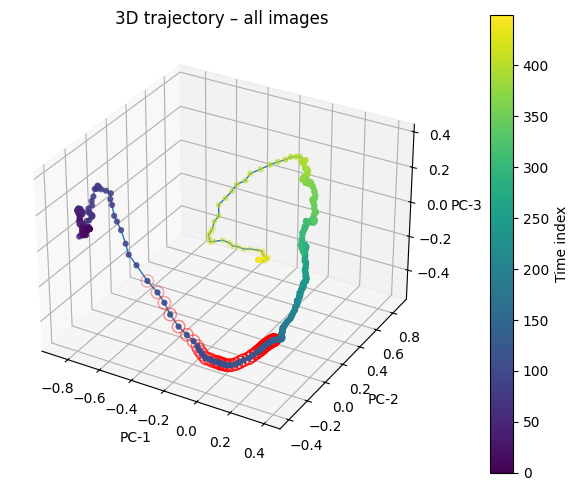

all faces - After demeaning+unit-norm EVR: [0.39004743 0.14022131 0.10395692] | cumulative: 0.6342256665229797
all faces — EVR per comp: [0.976 0.008 0.007] | cumulative: [0.976 0.984 0.991]


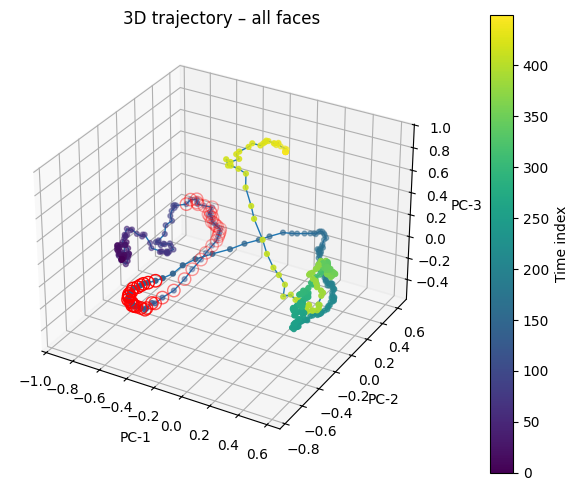

monkey faces - After demeaning+unit-norm EVR: [0.45827547 0.15278625 0.096108  ] | cumulative: 0.7071697115898132
monkey faces — EVR per comp: [0.976 0.008 0.007] | cumulative: [0.976 0.984 0.991]


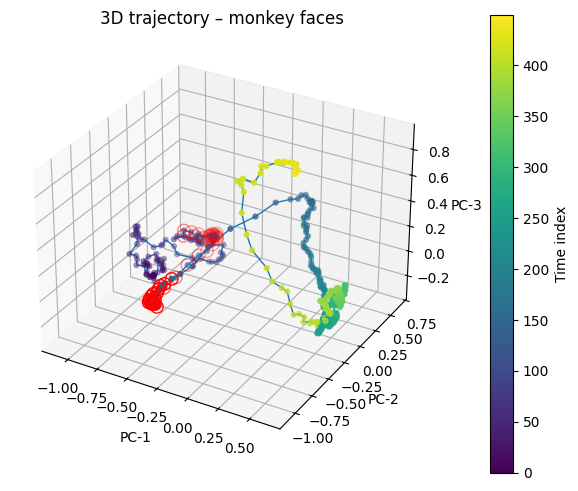

human faces - After demeaning+unit-norm EVR: [0.4019543  0.2163599  0.15177399] | cumulative: 0.7700881958007812
human faces — EVR per comp: [0.976 0.008 0.007] | cumulative: [0.976 0.984 0.991]


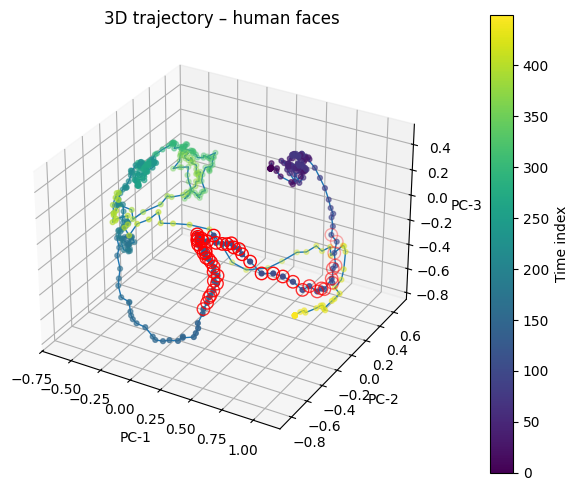

In [48]:
metric = 'correlation'
roi = 'MF1_8_F' #'MF1_9_F'
roi_data = raster_data[(raster_data['roi']==roi)]
stacked = np.stack(roi_data['img_psth'])

for k,v in img_sets.items():
    substacked = stacked[:, :, v]
    # average over units
    X = np.mean(substacked, axis=0)
    
    Xz = X - X.mean(axis=1, keepdims=True)
    Xz /= (np.linalg.norm(Xz, axis=1, keepdims=True) + 1e-8)
    pcaZ = PCA(n_components=3, random_state=0).fit(Xz)
    print(f"{k} - After demeaning+unit-norm EVR: {pcaZ.explained_variance_ratio_[:3]} | cumulative: {np.sum(pcaZ.explained_variance_ratio_[:3])}")
    coords = pcaZ.fit_transform(Xz)
    
#     # do pca on the data
#     pca = PCA(n_components=3, random_state=0)
#     coords = pca.fit_transform(averaged) 
    
    evr = pca.explained_variance_ratio_
    cum = evr.cumsum()
    print(f"{k} — EVR per comp: {np.round(evr, 3)} | cumulative: {np.round(cum, 3)}")

    T = coords.shape[0]
    ts = np.arange(T)

    # 3D plot
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111, projection='3d')

    # Draw trajectory line
    ax.plot(coords[:,0], coords[:,1], coords[:,2], 
            linewidth=1)

    # Scatter with time-coded colors
    sc = ax.scatter(coords[:,0], coords[:,1], coords[:,2],
                    c=ts, cmap='viridis', s=12)

    # Optional: highlight a particular time (e.g., 50)
    t_mark = np.arange(90, 140)
    if (t_mark < T).all:
        ax.scatter(coords[t_mark,0], coords[t_mark,1], coords[t_mark,2],
                   s=80, edgecolor='red', facecolor='none')

    ax.set_title(f"3D trajectory – {k}")
    ax.set_xlabel("PC-1"); ax.set_ylabel("PC-2"); ax.set_zlabel("PC-3")
    cbar = plt.colorbar(sc, ax=ax, pad=0.1)
    cbar.set_label("Time index")

    plt.tight_layout()
    plt.show()

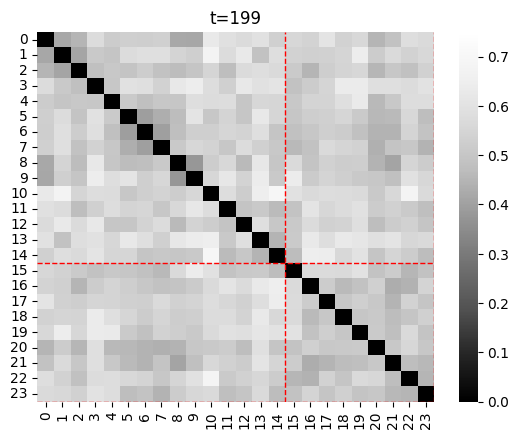

In [8]:
from IPython.display import clear_output
import time

metric = 'correlation'
roi = 'MF1_7_F' #'MF1_9_F'
roi_data = raster_data[(raster_data['roi']==roi)]
stacked = np.stack(roi_data['img_psth'])

for i in range(200):
    fig, ax = plt.subplots(1,1)
    substacked = stacked[:, i, 1000:1024]
    rdm = squareform(pdist(substacked.T, metric=metric))
    sns.heatmap(rdm, cmap=sns.color_palette('Greys_r', as_cmap=True), vmax=0.75, ax=ax)
    ax.set_title(f't={i}')
    
    ax.axvline(x=15, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=15, color='red', linestyle='--', linewidth=1)
    ax.axvline(x=24, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=24, color='red', linestyle='--', linewidth=1)
    
    plt.show()
    time.sleep(0.01)
    clear_output(wait=True)

In [9]:
savedir = '../gifs/localizer_set/'
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
metric = 'correlation'
    
roi = 'MF1_7_F' #'MF1_9_F'
roi_data = raster_data[(raster_data['roi']==roi)]
stacked = np.stack(roi_data['img_psth'])
    
for i in tqdm(range(200)):
    fig, ax = plt.subplots()
    substacked = stacked[:, i, 1000:1024]
    rdm = squareform(pdist(substacked.T, metric=metric))
    sns.heatmap(rdm, cmap=sns.color_palette('Greys_r', as_cmap=True), vmax=0.75, ax=ax)
    ax.set_title(f't={i}')
    plt.tight_layout()
    plt.savefig(os.path.join(savedir,f'frame_{i:03d}.png'), dpi=300, transparent=False, bbox_inches='tight')
    plt.close(fig)
    
print('done')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:23<00:00,  8.57it/s]

done
